<a href="https://colab.research.google.com/github/douglas-t/acs-community-deployment/blob/master/clursering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/datasets')

Mounted at /content/drive


In [5]:
import pandas as pd
data_mall=pd.read_csv('Mall_Customers.csv',sep=',',index_col=0,header=0)

In [7]:
data_mall.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
182,Female,32,97,86
97,Female,47,60,47
195,Female,47,120,16
31,Male,60,30,4
77,Female,45,54,53


In [8]:
data_mall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [9]:
data_mall.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
data_mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [11]:
#nombre total des valeurs manquantes pour chaque caractéristique
print(data_mall.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [12]:
#calcule la fréquence
freq=data_mall['Gender'].value_counts()
print(freq)

Gender
Female    112
Male       88
Name: count, dtype: int64


In [13]:
data_mall['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
dummies=pd.get_dummies(data_mall['Gender']).rename(columns=lambda x: 'Gender_' + str(x))
data_mall=pd.concat([data_mall,dummies],axis=1)
data_mall.drop('Gender',axis=1,inplace=True)

In [15]:
data_mall.head (3)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,False,True
2,21,15,81,False,True
3,20,16,6,True,False


**Kmeans**
Creation du module

In [ ]:
#les parametres du modèle
   #n_clusters: cluster number
   #init: initialization method: kmeans++ method
   #max_iter: the maximum iterations number there can be to find the final cluster: 300
   #n_init: the number of times the algorithm will be run with different centroid seeds. The final results will be
   #n_init: the number of times k_means algorithm will be run with different initial centroid

In [16]:
#init ='k-means++', max_iter=300, n_init=10, random_state=0
from sklearn.cluster import KMeans
n_clusters=5
modelKM_5=KMeans(n_clusters)
modelKM_5=modelKM_5.fit(data_mall)

In [17]:
import numpy as np
#cluster de chaque observations
print('les groupes obtenus')
#index triés des groupes
idk=np.argsort(modelKM_5.labels_)
print('index triés des groupes')
print(idk)

les groupes obtenus
index triés des groupes
[125 127 123 165 173 175 171 169 185 187 191 189 181 183 179 177 145 147
 151 149 157 159 155 153 137 139 143 141 193 195 199 197 161 163 167 129
 133 135 131  48  56  57  58  59  52  49  50  51  46  47 101 108 107 106
 105 104  99  98  97 100  60  53  54  55 119 118 109 112 116 113 114 115
 122 121 117 120 126 103 102  88  72  73  70  78  75  74  77  76  69  67
  66  71  96  61  63  62  80  81  79  94  91  90  93  92  87  86  85  84
  83  82  89 111  64  95 110 146 150 148 144 134 154 152 156 158 130 128
 132 124 190 188 184 186 194 192 196 198 182 180 176 178 138 136 140 142
 174 172 168 170 162 160 164 166  24  26  30  28  20  22  10   8  16  18
   0   2  12  14   6   4  34  44  36  38  40  32  42   7  31  29  41  43
  35  33  37  39  45   5   1   3  11   9  13  15  65  68  25  27  19  17
  21  23]


In [18]:
data_mall.loc[data_mall.index[idk]]
modelKM_5.labels_[idk]
groupes_KM=pd.DataFrame(modelKM_5.labels_[idk],index=data_mall.index[idk],columns=['groupes_KM'])
groupes_KM
data_mall_gr=pd.concat([data_mall,groupes_KM],axis=1)
#affichage les données par cluster
data_mall_gr
#Affichage des données du premier cluster
#data_mall_gr.loc[data_mall_gr.groupe KM==0, 'Age']
#data_mall_gr.iloc[:,1]

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,groupes_KM
CustomerID,,,,,,
1,19,15,39,False,True,3
2,21,15,81,False,True,4
3,20,16,6,True,False,3
4,23,16,77,True,False,4
5,31,17,40,True,False,3
...,...,...,...,...,...,...
196,35,120,79,True,False,0
197,45,126,28,True,False,2
198,32,126,74,False,True,0


In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

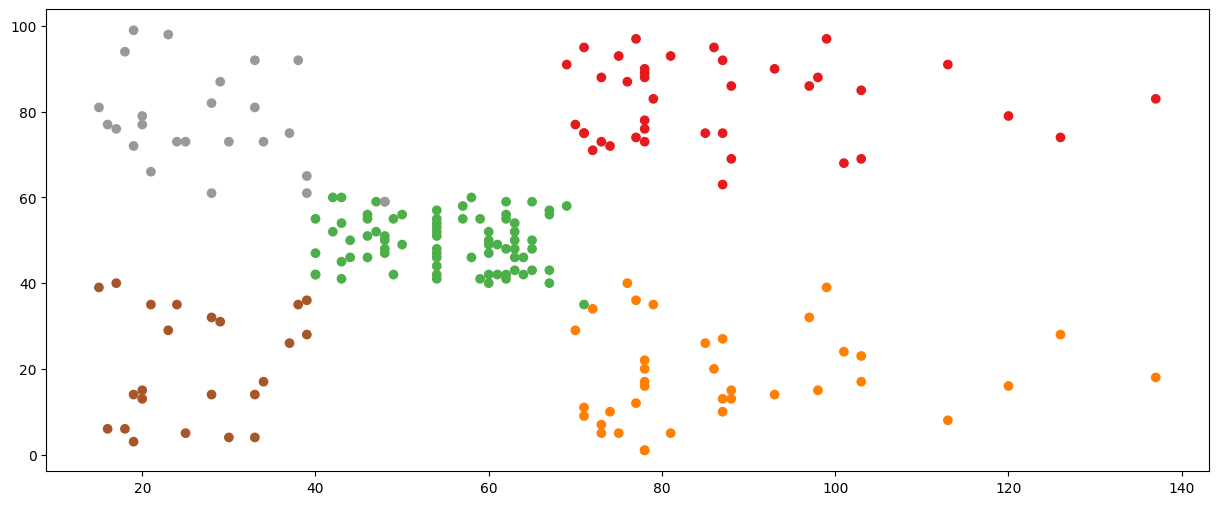

In [20]:
#visualisation des clusters / modelKM.label_.astype(float) / c=colormap[modelKM_5.labels_]
plt.figure(figsize=(15,6))
#colormap = np.array(['red','green','blue,'pink','purple'])
plt.scatter(data_mall.iloc[:,1], data_mall.iloc[:,2], c=modelKM_5.labels_.astype(float),cmap=plt.cm.Set1)


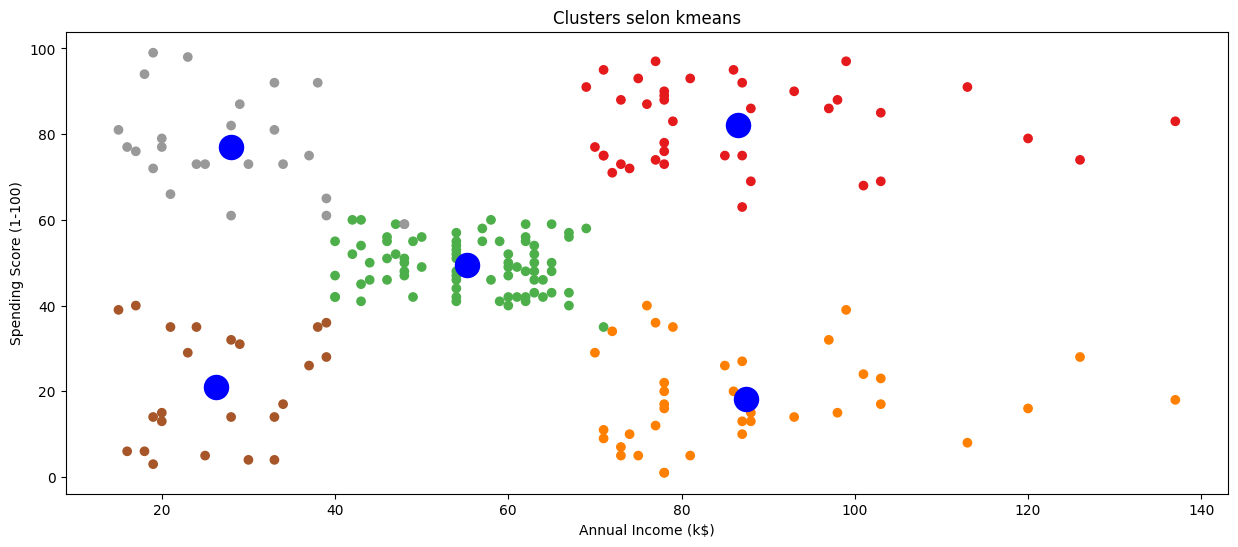

In [25]:
plt.figure(figsize=(15,6))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters selon kmeans')
plt.scatter(data_mall.iloc[:,1], data_mall.iloc[:,2], c=modelKM_5.labels_.astype(float),cmap=plt.cm.Set1)
#Ajouter le centre du cluster
plt.scatter(modelKM_5.cluster_centers_[:,1],
            modelKM_5.cluster_centers_[:,2], s=300,
            c='blue', label='Centroids')

*******Choix optimal du nombre de cluster****************** ***bold text***

Evaluation par calcul par distorsion: methode coude

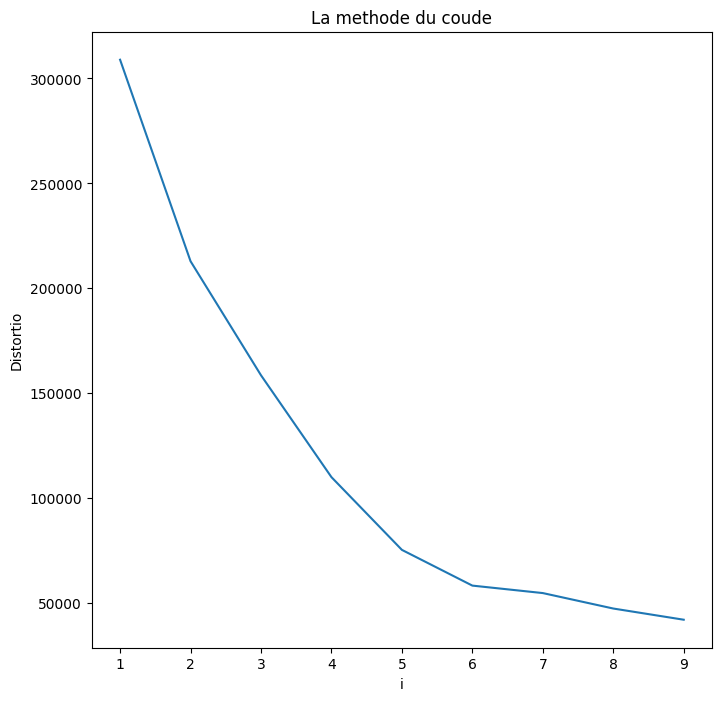

In [29]:
#Methode distorsion basée l'inertie/variance intra-cluster
#ModelKM5_inertia:Somme des distances au carrée des échantillons par rapport à leur centre de cluster le plus proche.
distortions=[]
k=range(1,10)
for i in k:
  modelKM=KMeans(n_clusters=i)
  modelKM=modelKM.fit(data_mall)
  distortions.append(modelKM.inertia_)
#Visualisation de la courbe Eblow
plt.figure(figsize=(8,8))
plt.plot(k,distortions)

plt.xlabel('i')
plt.ylabel('Distortio')
plt.title('La methode du coude')
plt.show()

********Une autre manière pour la visualisation de la méthode du coude******* **bold text**

In [33]:
!pip install yellowbrick

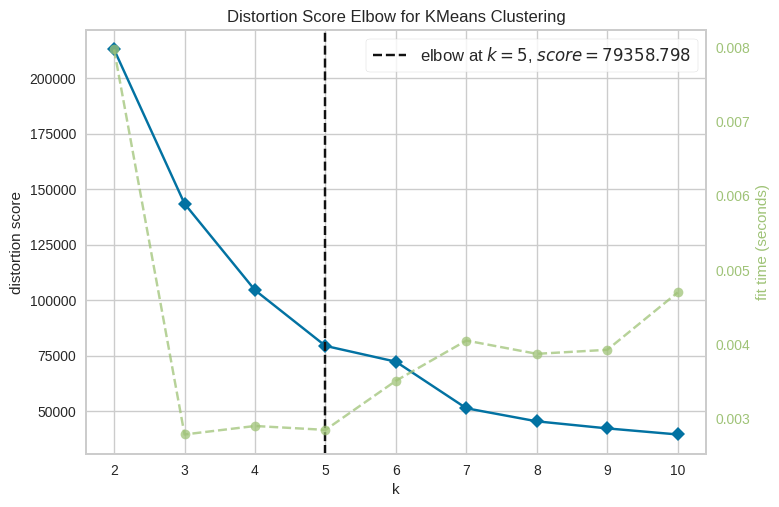

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
#Utilisation de la mothode KElbow visualizer pour trouver le nombre optimal des clusters
#Il faut installer la librairie yellowbrick : pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
# k=nombre de cluster
# Distortion est la valeur par defaut / methode de coude
visualizer_Eblow=KElbowVisualizer(model,k=(2,11), metric='distortion', timings=True)
visualizer_Eblow.fit(data_mall)
visualizer_Eblow.show()